# iLykei Lecture Series

# Advanced Machine Learning and Artificial Intelligence (MScA 32017)

# Reinforcement Learning

## Notebook 2: Gridworld Examples

## Yuri Balasanov, Leonid Nazarov, &copy; iLykei 2019

##### Main texts: 

Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurelien Geron, &copy; Aurelien Geron 2017, O'Reilly Media, Inc

Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning series), &copy; 2018 Richard S. Sutton, Andrew G. Barto, The MIT Press

This notebook discusses examples of MDP and DP from Chapters 3,4 of the book by Sutton, Barto. 


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
# import pydotplus
from IPython.display import Image, display, clear_output
# from sklearn.externals.six import StringIO 
import networkx as nx
import time


## Example on graph

Define matrix of rewards for a graph shown below. For example, first element of the list of rewards, `[-1,-1,-1,-1,0,-1]`, shows that the only possible transition from state $s_0$ is to state $s_4$ and it results in collecting reward 0. This matrix also shows that the only positive rewards are collected for transitions:

- $s_1~->~s_5$
- $s_4~->~s_5$
- $s_5~->~s_5$

Rewards: 
 [[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0  -1  -1   0 100]]
Graph edges: 
 [[0, 4], [1, 3], [1, 5], [2, 3], [3, 1], [3, 2], [3, 4], [4, 1], [4, 2], [4, 5], [5, 1], [5, 4], [5, 5]]


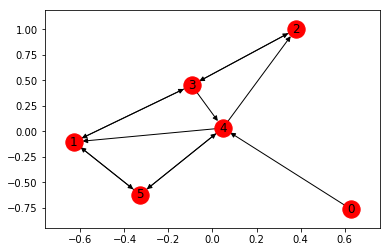

In [2]:
# R matrix
R = np.array([  [-1,-1,-1,-1,0,-1],
                [-1,-1,-1,0,-1,100],
                [-1,-1,-1,0,-1,-1],
                [-1,0,0,-1,0,-1],
                [-1,0,0,-1,-1,100],
                [-1,0,-1,-1,0,100] ])
print('Rewards: \n',R)

# Plot the graph
n = len(R)
G=nx.DiGraph()
edges = list([i,j] for i in range(n) for j in range(n) if R[i,j]>=0)
print('Graph edges: \n',edges)
G.add_edges_from(edges)
pos = nx.spring_layout(G) #Position nodes using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()



Try several other configurations of the graph.

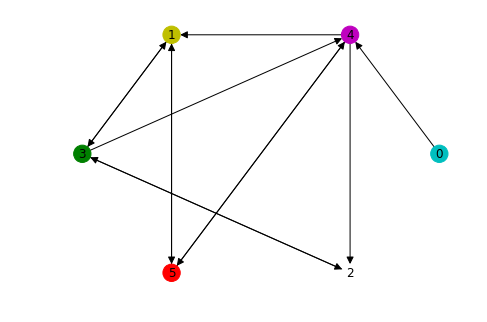

In [3]:
nx.draw_circular(G,arrowsize=15,with_labels=True,      # Draw the graph G with a circular layout
                 node_color=np.array(['c','y','w','g','m','r'])[G.nodes])

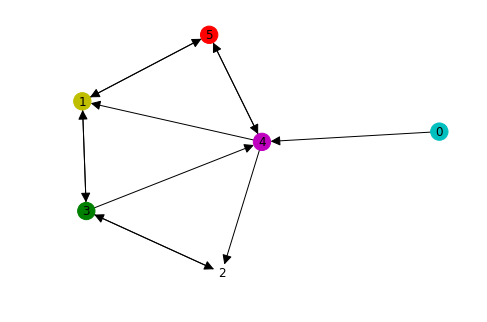

In [4]:
nx.draw_kamada_kawai(G,arrowsize=20,with_labels=True, # Draw the graph G with a Kamada-Kawai force-directed layout
                     node_color=np.array(['c','y','w','g','m','r'])[G.nodes])

Define and initiate Q-function as state-action matrix. Select discount rate $\gamma$. Select initial state.

In [5]:
# Q matrix
Q = np.matrix(np.zeros([6,6]))
print('Action-value matrix: \n',Q)

# Gamma (discount rate).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

Action-value matrix: 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


Create a function returning available action for any state.

In [6]:
def available_actions(state):
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)[0]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 
print('Available actions for the initial state: \n',available_act)

Available actions for the initial state: 
 [3 5]


Create a function selecting random action from actions available in the given state: random strategy.

In [7]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)
print('Action randomly selected for the first iteration: ',action)

Action randomly selected for the first iteration:  3


Create a function running one Q-value iteration according to the formula:
$$Q^*_{k+1}(S,a)=\sum_{s'} P(S,a,S') \left[R(S,a,S') + \gamma \max_{a'} Q^*_k(S',a') \right].$$
Because in this particular example selected action always leads to single following state the sum in the right-hand side is reduced to just one term.

In [8]:
# This function updates the Q matrix according to the path selected and the Q-learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q-value iteration formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    
# Update Q matrix
update(initial_state,action,gamma)
print('Action-value Q-matrix after first iteration: \n',Q)

Action-value Q-matrix after first iteration: 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


Reinitialize the matrix and start training for 250 iterations.

iteration  240


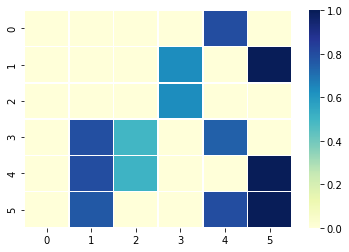

None

In [9]:
# Training
Q = np.matrix(np.zeros([6,6]))
nb_iter = 250
# Train over nb_iter iterations. (Re-iterate the process above).
for i in range(nb_iter):
    current_state = np.random.randint(0, int(Q.shape[0])) # Select random initial state
    available_act = available_actions(current_state)      # Get available actions
    action = sample_next_action(available_act)            # Select random action from available actions
    update(current_state,action,gamma)                    # Update Q-matrix
    if i%10==0:                                           # Visualize every 10 iterations
        ax = sns.heatmap(Q/(np.max(Q)+1e-7), vmin=0, vmax=1, 
                         linewidth=0.5, cmap="YlGnBu")
        print('iteration ',i)
        display(plt.show())
        clear_output(wait=True)
        time.sleep(.5)


In [10]:
print('Trained Q-matrix: \n',np.around(Q, decimals=2))

Trained Q-matrix: 
 [[   0.      0.      0.      0.    392.91    0.  ]
 [   0.      0.      0.    312.91    0.    494.32]
 [   0.      0.      0.    314.32    0.      0.  ]
 [   0.    391.13  250.32    0.    392.91    0.  ]
 [   0.    394.32  250.32    0.      0.    491.13]
 [   0.    378.35    0.      0.    392.91  492.91]]


Repeat training visualizing the progress on the graph.

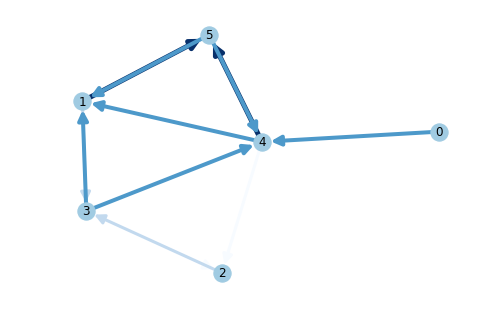

None

In [11]:
# Training
Q = np.matrix(np.zeros([6,6]))
nb_iter = 250
# Train over nb_iter iterations. (Re-iterate the process above).
for i in range(nb_iter):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    if i%8==0:
        Q_max = np.max(Q) + 1e-7
        weights = np.array([Q[e]/Q_max for e in G.edges])
        ax = nx.draw_kamada_kawai(G, node_color='#A0CBE2', edge_color=2*weights,
                             width= np.round(5*weights), edge_cmap=plt.cm.Blues, 
                             arrowsize=20,with_labels=True,)
        display(plt.show())
        clear_output(wait=True)
        time.sleep(.5)

Try generating a path using the trained Q-matrix, starting at node 2.

In [12]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(np.round(Q/np.max(Q),2))


current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

Trained Q matrix:
[[ 0.    0.    0.    0.    0.8   0.  ]
 [ 0.    0.    0.    0.64  0.    1.  ]
 [ 0.    0.    0.    0.64  0.    0.  ]
 [ 0.    0.8   0.51  0.    0.8   0.  ]
 [ 0.    0.8   0.51  0.    0.    1.  ]
 [ 0.    0.8   0.    0.    0.8   0.98]]
Selected path:
[2, 3, 4, 5]


## Example with gridworld

This example is from page 61 of Chapter 4 in the book by Sutter&Barto.

Define the matrix of rewards of a grid with 14 states, plus one absorbing terminal state shown as nodes 0 and 15 (even though these are 2 nodes, but they represent 1 state).

Reaching any of the nodes of the terminal state earns 100, all other transitions earn reward 0.

Available actions at each node are transitions to any of the neighbor nodes, but not leading outside the grid.

This is an episodic task: episode of interaction ends as soon as agent reaches one of the terminal nodes.
Expected result of learning is finding the shortest way to the nearest terminal node.

Define array of rewards and plot the grid with available actions.

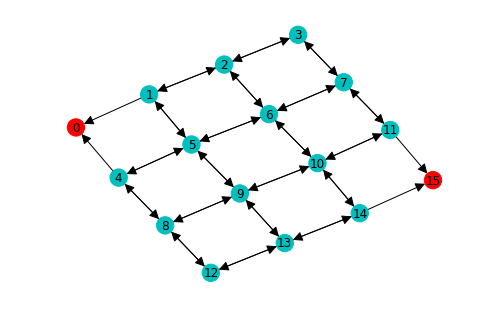

In [13]:
# R matrix
# nonterminal states :1,2,...,14, terminal 0,15
n = 16
R = np.zeros((n,n)) - 1 
R[1,0] = R[4,0] = R[11,15] = R[14,15] = R[0,0] = R[15,15] = 100
for i,si in [(1,[2,5]),(2,[1,3,6]),(3,[2,7]),
             (4,[5,8]),(5,[1,4,6,9]),(6,[2,5,7,10]),(7,[3,6,11]),
             (8,[4,9,12]),(9,[5,8,10,13]),(10,[6,9,11,14]),(11,[7,10]),
             (12,[8,13]),(13,[9,12,14]),(14,[10,13])]:
    for j in si: R[i,j] = 0

G=nx.DiGraph()
edges = list([i,j] for i in range(n) for j in range(n) if R[i,j]>=0)
G.add_edges_from(edges)
nx.draw_kamada_kawai(G,arrowsize=20,with_labels=True,
                    node_color=np.array(['r']+['c']*(n-2)+['r'])[G.nodes])

Show available actions for node 1.

In [14]:
available_actions(1)

array([0, 2, 5])

Train the agent to travel across the gridworld.

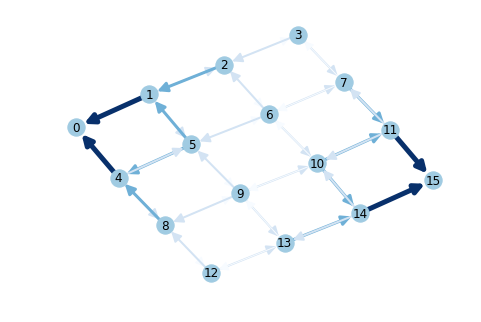

None

In [15]:
# Training
Q = np.matrix(np.zeros([n,n]))
nb_iter = 500
gamma = 0.6     # Gamma (discount rate)

# Train over nb_iter iterations. (Re-iterate the process above).
for i in range(nb_iter):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    if i%8==0:
        Q_max = np.max(Q) + 1e-7
        weights = np.array([Q[e]/Q_max for e in G.edges])
        ax = nx.draw_kamada_kawai(G, node_color='#A0CBE2', edge_color=2*weights,
                             width= np.round(5*weights), edge_cmap=plt.cm.Blues, 
                             arrowsize=20,with_labels=True,)
        display(plt.show())
        clear_output(wait=True)
        time.sleep(.5)

In [16]:
print('Trained Q-matrix: \n',np.around(Q, decimals=1))

Trained Q-matrix: 
 [[ 250.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [ 250.    0.   90.    0.    0.   90.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.  150.    0.   54.    0.    0.   54.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.   90.    0.    0.    0.    0.   90.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [ 250.    0.    0.    0.    0.   90.    0.    0.   90.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.  150.    0.    0.  150.    0.   54.    0.    0.   54.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.   90.    0.    0.   90.    0.   90.    0.    0.   90.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.   54.    0.    0.   54.    0.    0.    0.    0.  150.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.  150.    0.    0.    0.    0.   54.    0.    0.
    54.    0.    0.    0.]
 [   0.    0.    0.    0.    0.   90.    0.    0.   90.    0.   90.    